In [12]:
import numpy as np
import numpy.fft as fft
import matplotlib.pyplot as plt 

%matplotlib inline
%load_ext autoreload
%autoreload 2

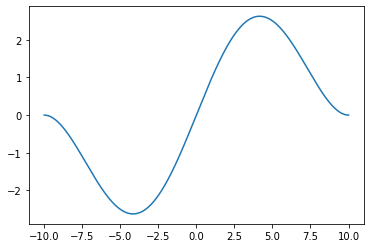

In [55]:
def HenningWindow(x: np.array) -> np.array:
    result = np.zeros_like(x)
    N = x.shape[0]
    for i in range(N):
        result[i] = x[i] * 0.5 *(1 - np.cos((2 * np.pi * i) / (N - 1)))

    return result

x = np.linspace(-10, 10, 1000)
plt.plot(x, HenningWindow(x));

In [71]:
def plotFFT(f: np.ndarray, t: np.ndarray):
    data = [f, HenningWindow(f)]
    titles = ["Прямоугольное окно", "Окно Ханна"]    
    fft_data = np.abs(fft.fft(data))
    timestep = t[1] - t[0]
    freq = fft.fftfreq(t.size, d=timestep) * np.pi * 2
    mask = freq > 0
    freq = freq[mask]


    plt.figure(dpi=80, figsize=(18, 6))
    max_fft = np.max(fft_data)

    for i, res in enumerate(fft_data):
        res = res[mask]
        plt.subplot(1, len(data), i + 1)
        plt.title(titles[i])
        plt.grid()
        #plt.stem(freq, res, use_line_collection=True, linefmt='C3', markerfmt=None)
        plt.plot(freq, res, "-s")
        plt.xlabel("w")
        plt.ylabel("abs")
        #plt.ylim(0, max_fft * 1.1)

    plt.tight_layout()

# Синусоидальный сигнал

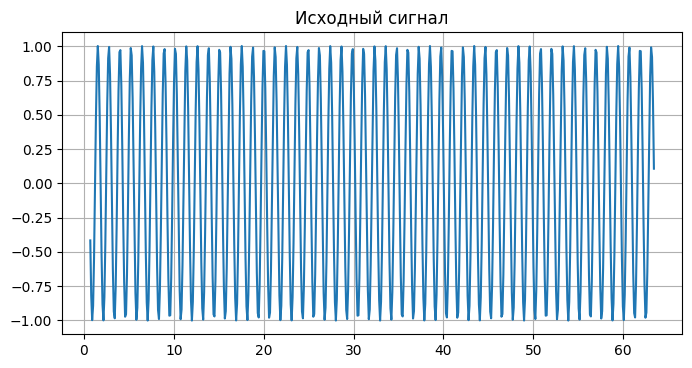

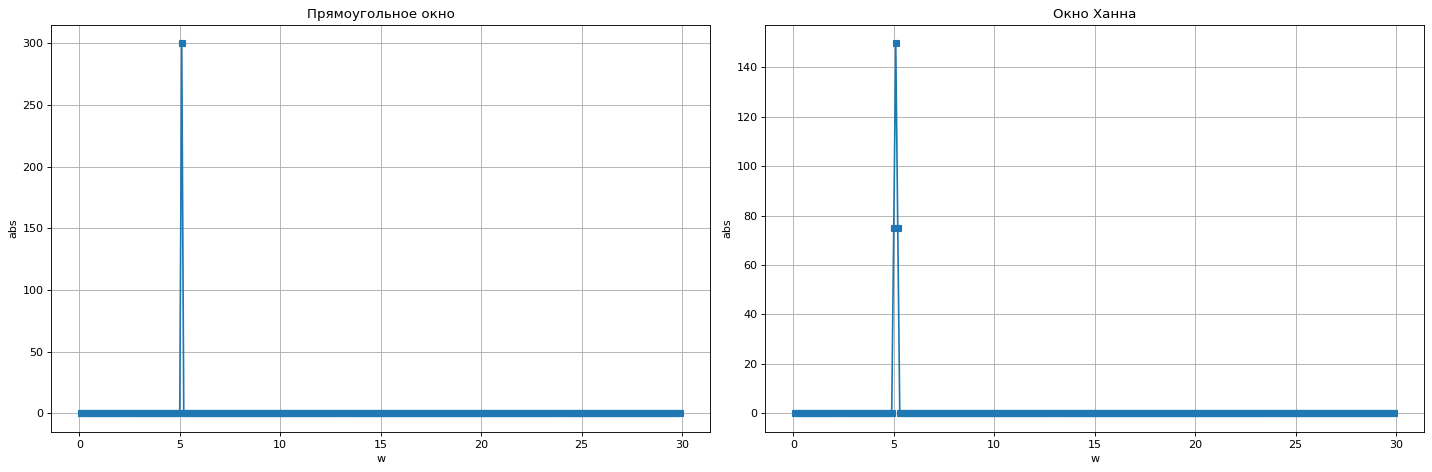

In [86]:
dt = np.pi/ 30
start = 0.7
width = 20 * np.pi
t = np.arange(start, start + width, dt)
f = np.sin(5.1 * t) + 0.002 * np.sin(25.5 * t)
plt.figure(figsize=(8, 4), dpi=100)
plt.plot(t, f)
plt.title("Исходный сигнал")
plt.grid()

plotFFT(f, t)